In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
data = pd.read_csv('월별공급량및비중all.csv')
data["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
data

,YEAR,MONTH,도시가스(톤)_민수용,도시가스(톤)_산업용,도시가스(톤)_총합(민수용+산업용),민수용비중,산업용비중,ID
0,1996,1,605519.0,83809.0,689328.0,0.87842,0.12158,1996-01-01
1,1996,2,566323.0,70427.0,636750.0,0.88940,0.11060,1996-02-01
2,1996,3,477514.0,62652.0,540166.0,0.88401,0.11599,1996-03-01
3,1996,4,337794.0,47050.0,384844.0,0.87774,0.12226,1996-04-01
4,1996,5,184522.0,30709.0,215231.0,0.85732,0.14268,1996-05-01
...,...,...,...,...,...,...,...,...
295,2020,8,398661.0,457970.0,856631.0,0.46538,0.53462,2020-08-01
296,2020,9,380235.0,525619.0,905853.0,0.41975,0.58025,2020-09-01
297,2020,10,616682.0,600890.0,1217571.0,0.50649,0.49352,2020-10-01
298,2020,11,1093747.0,665901.0,1759648.0,0.62157,0.37843,2020-11-01


In [24]:
civil = data["도시가스(톤)_민수용"]
civil.index = data["ID"]
civil

ID
1996-01-01     605519.0
1996-02-01     566323.0
1996-03-01     477514.0
1996-04-01     337794.0
1996-05-01     184522.0
                ...    
2020-08-01     398661.0
2020-09-01     380235.0
2020-10-01     616682.0
2020-11-01    1093747.0
2020-12-01    1921404.0
Name: 도시가스(톤)_민수용, Length: 300, dtype: float64

In [25]:
civil = civil.to_frame()
civil.columns=['gas']
civil

,gas
ID,
1996-01-01,605519.0
1996-02-01,566323.0
1996-03-01,477514.0
1996-04-01,337794.0
1996-05-01,184522.0
...,...
2020-08-01,398661.0
2020-09-01,380235.0
2020-10-01,616682.0


array([<AxesSubplot:xlabel='ID'>], dtype=object)

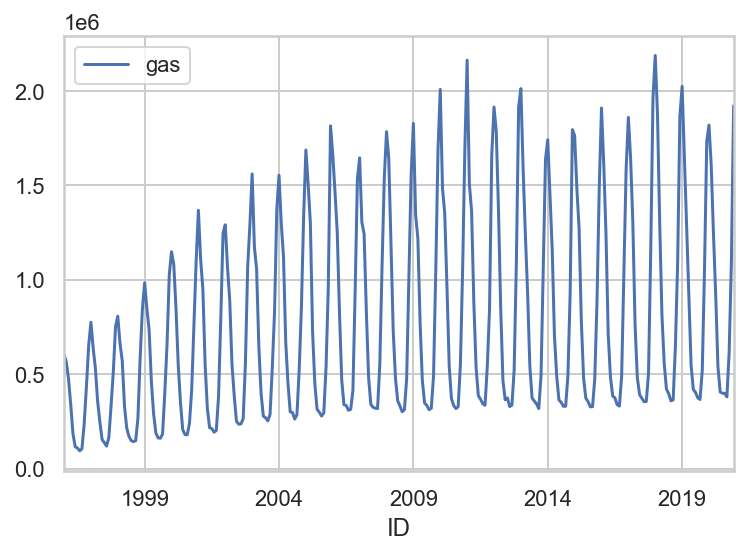

In [26]:
civil.plot(subplots=True)

In [27]:
from sklearn.model_selection import train_test_split
gas_train, gas_test = train_test_split(civil['gas'], test_size=0.2, shuffle=False)
print(gas_train, gas_test)

ID
1996-01-01     605519.0
1996-02-01     566323.0
1996-03-01     477514.0
1996-04-01     337794.0
1996-05-01     184522.0
                ...    
2013-02-01    1587145.0
2013-03-01    1240854.0
2013-04-01     931144.0
2013-05-01     544889.0
2013-06-01     374368.0
Name: gas, Length: 210, dtype: float64 ID
2013-07-01     358204.0
2013-08-01     342725.0
2013-09-01     318873.0
2013-10-01     492833.0
2013-11-01    1059637.0
                ...    
2020-08-01     398661.0
2020-09-01     380235.0
2020-10-01     616682.0
2020-11-01    1093747.0
2020-12-01    1921404.0
Name: gas, Length: 90, dtype: float64


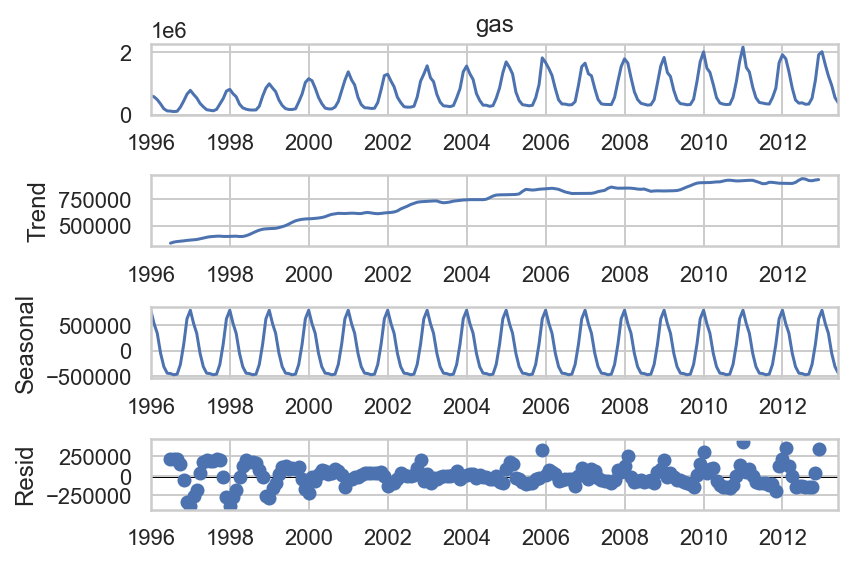

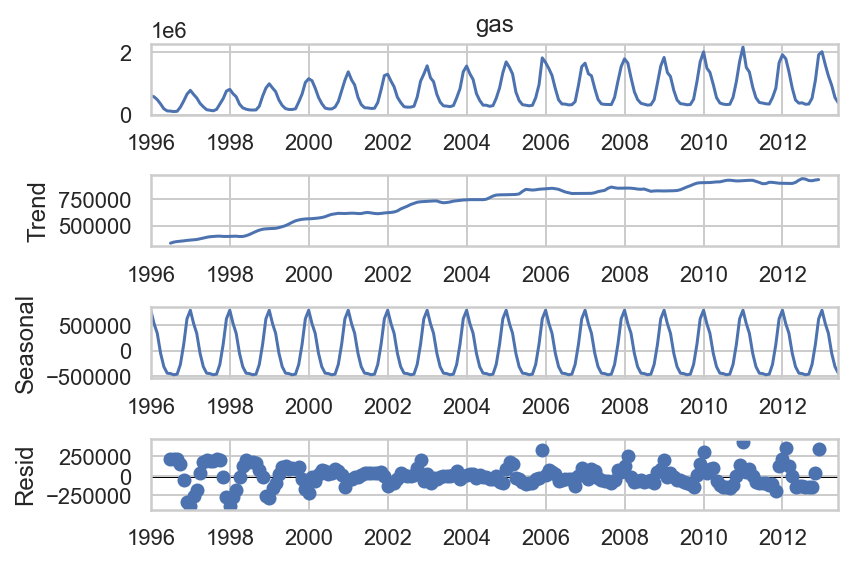

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(gas_train, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='ID'>

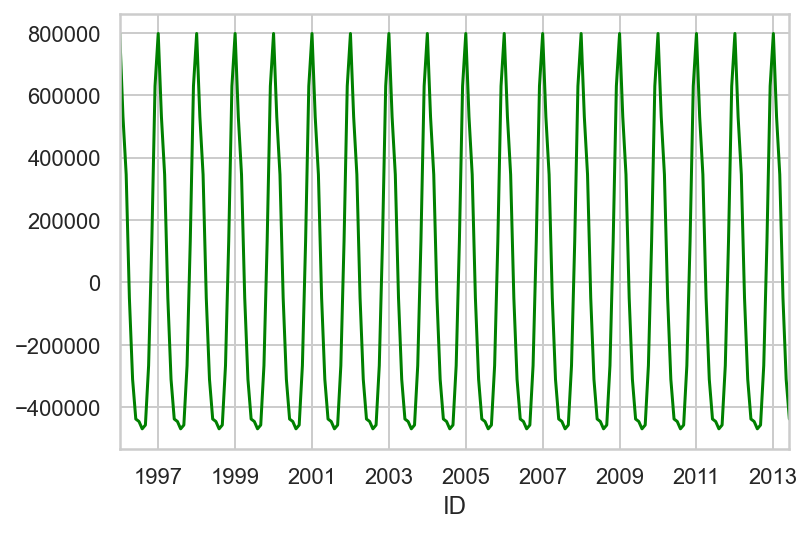

In [29]:
seasonality = decompose_data.seasonal
seasonality.plot(color='green')

In [30]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(gas_train, autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
#p-value 0.05보다 크므로 비정상 시계열

1. ADF :  -2.171773043785144
2. P-Value :  0.21664922121903318
3. Num of Lags :  12
4. Num of Observations used for ADF Regression and Critical Values Calculation :  197
5. Critical Values : 
	 1% :  -3.463987334463603
	 5% :  -2.8763259091636213
	 10% :  -2.5746515171738515


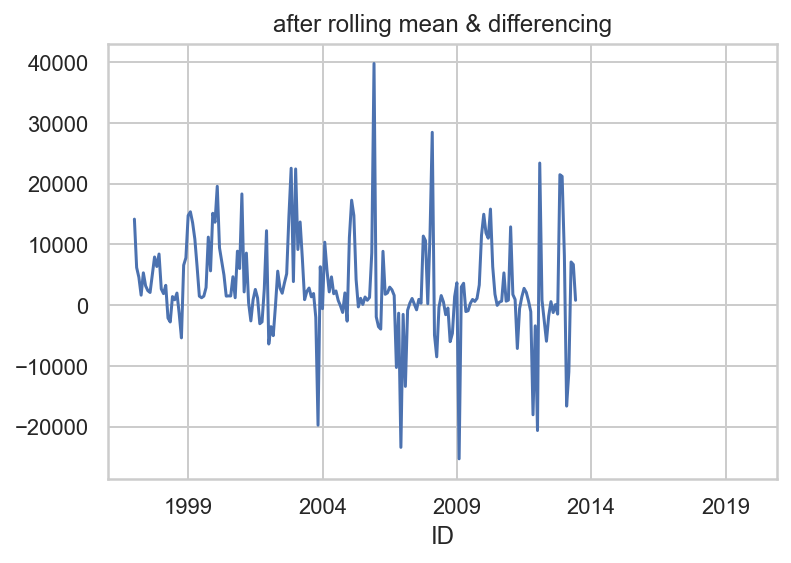

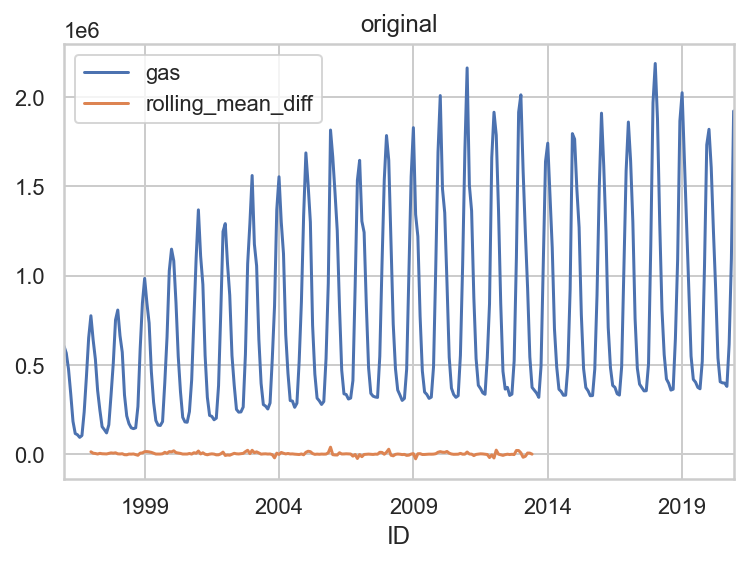

In [31]:
rolling_mean = gas_train.rolling(window=12).mean()
civil['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
civil['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
civil.plot(title='original');

In [32]:
dftest = adfuller(civil['rolling_mean_diff'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -4.105676246349329
2. P-Value :  0.0009478109016972513
3. Num of Lags :  12
4. Num of Observations used for ADF Regression and Critical Values Calculation :  185
5. Critical Values : 
	 1% :  -3.4662005731940853
	 5% :  -2.8772932777920364
	 10% :  -2.575167750182615


In [33]:
gas_train.index = pd.DatetimeIndex(gas_train.index.values,
                               freq=gas_train.index.inferred_freq)

In [34]:
from pmdarima.arima import auto_arima
auto_arima_model = auto_arima(gas_train, 
                              start_p=0, max_p=5, 
                              start_q=0, max_q=5, 
                              seasonal=True,
                              d=1, m=12,
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=False)
auto_arima_model

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5157.483, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5113.958, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=5125.174, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5117.768, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=5113.114, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=5115.721, Time=0.35 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5116.859, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=5115.045, Time=0.28 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=5117.181, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5107.239, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5089.648, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5090.898, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5090.807, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5091.155, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5093.134, Time=0.61

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(gas_train, order=(0,1,3), seasonal_order=(0,1,1,12))
results = model.fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  gas   No. Observations:                  210
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -2532.001
Date:                              Wed, 12 Oct 2022   AIC                           5074.002
Time:                                      00:53:34   BIC                           5090.418
Sample:                                  01-01-1996   HQIC                          5080.647
                                       - 06-01-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4717      0.066     -7.126      0.000      -0.602      -0.342
ma.L2         -0.1215      0.093     -1.308      0.191      -0.304       0.061
ma.L3         -0.2468      0.079     -3.136      0.002      -0.401      -0.093
ma.S.L12      -0.3875      0.072     -5.418      0.000      -0.528      -0.247
sigma2      1.015e+10   1.19e-12   8.54e+21      0.000    1.01e+10    1.01e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                92.40
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.80
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+38. Standard errors may be unstable.
"""

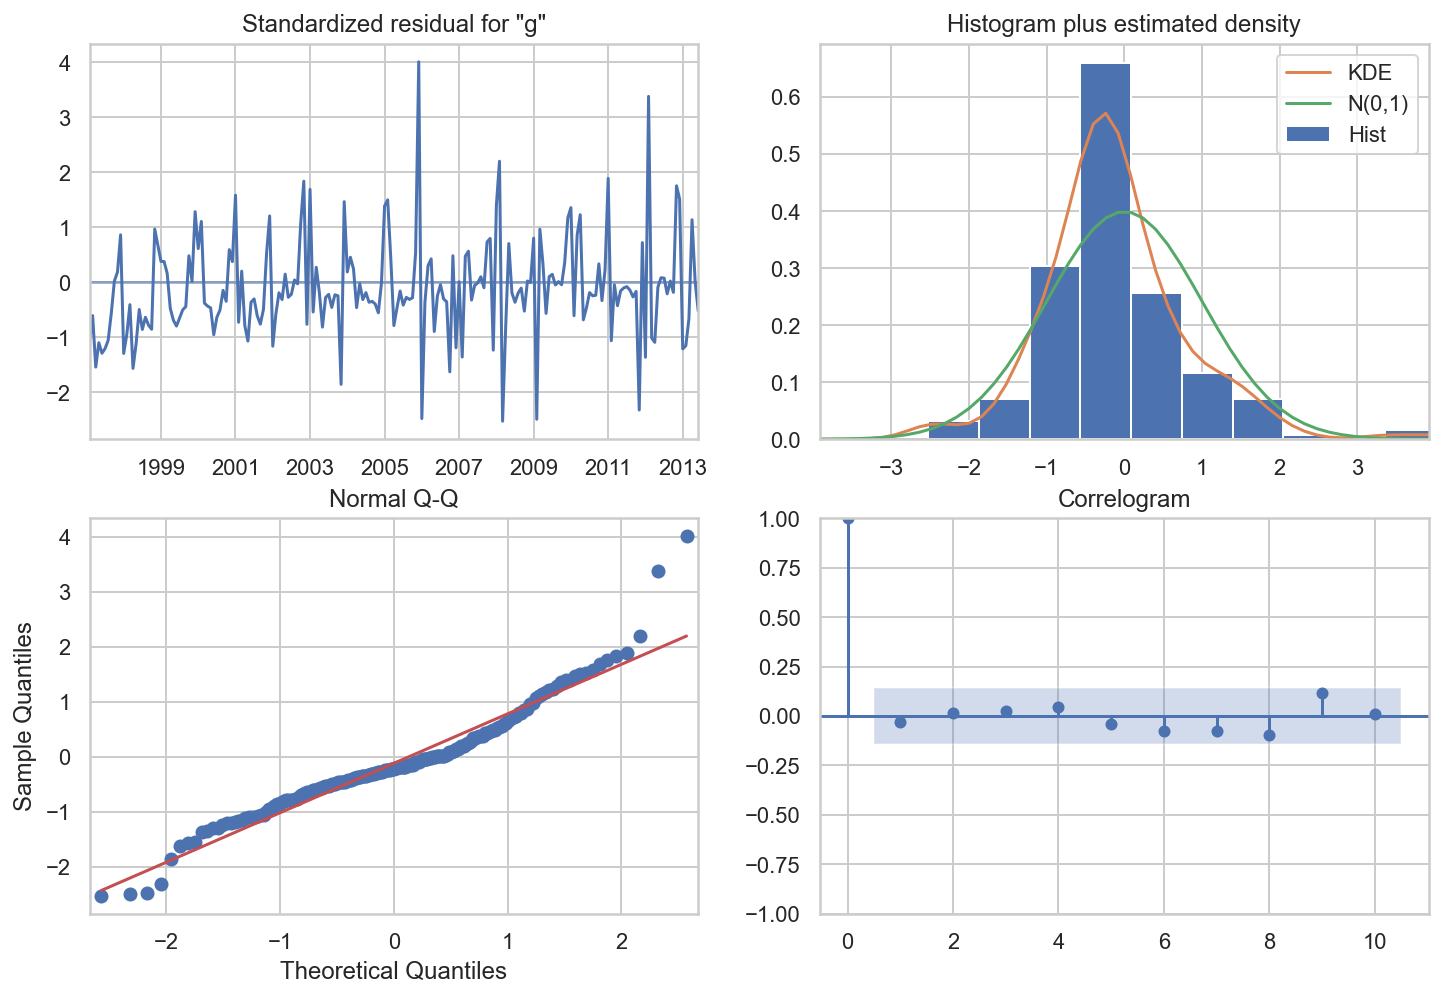

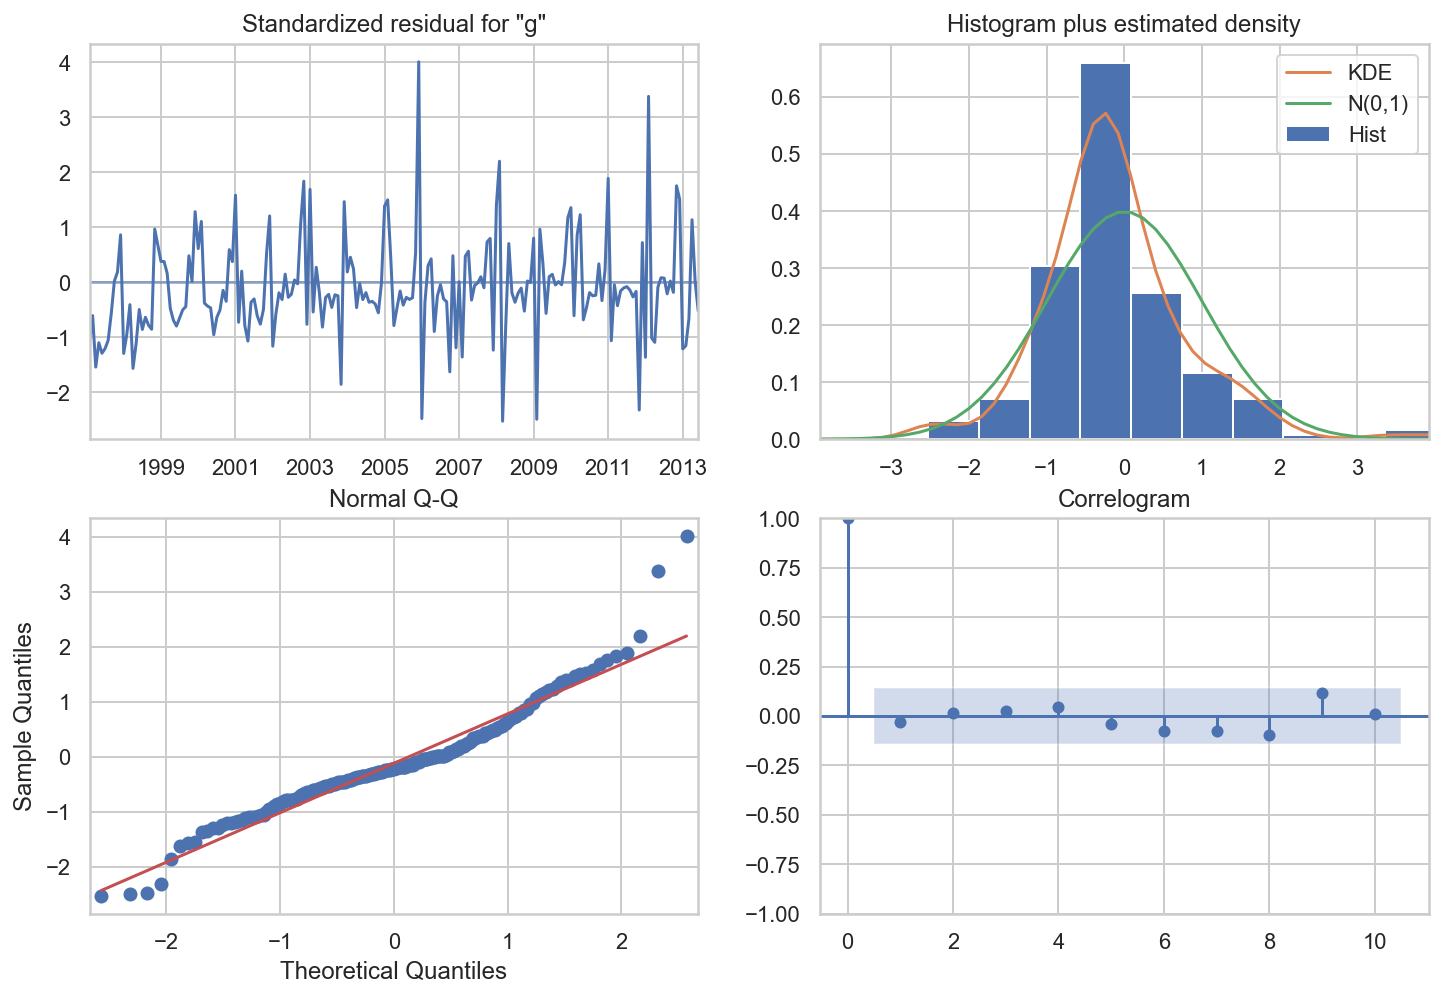

In [37]:
results.plot_diagnostics(figsize=(12,8))

<AxesSubplot:xlabel='ID'>

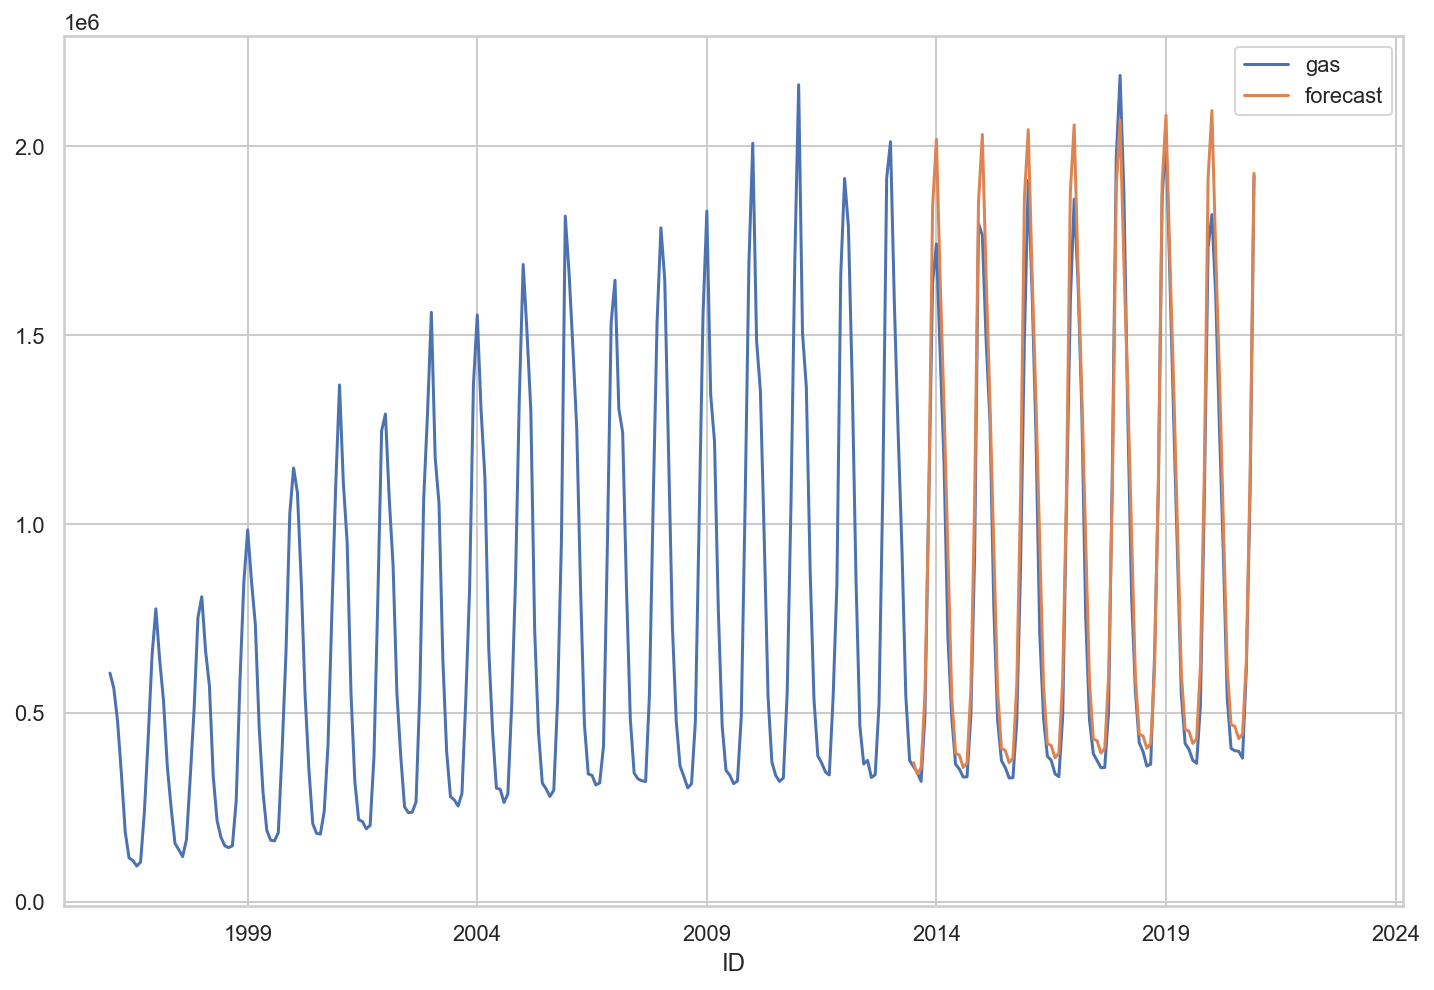

In [38]:
civil['forecast']=results.predict(start=210, end=300, dynamic=True)
civil[['gas','forecast']].plot(figsize=(12,8), xlim=[300,650])

In [39]:
from pandas.tseries.offsets import DateOffset
pred_date = [civil.index[-1] + DateOffset(months=x) for x in range(0,169)]

In [40]:
pred_date = pd.DataFrame(index=pred_date[1:], columns=civil.columns)
pred_date.head()

,gas,rolling_mean_diff,forecast
2021-01-01,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN


In [41]:
civil = pd.concat([civil, pred_date])

<AxesSubplot:>

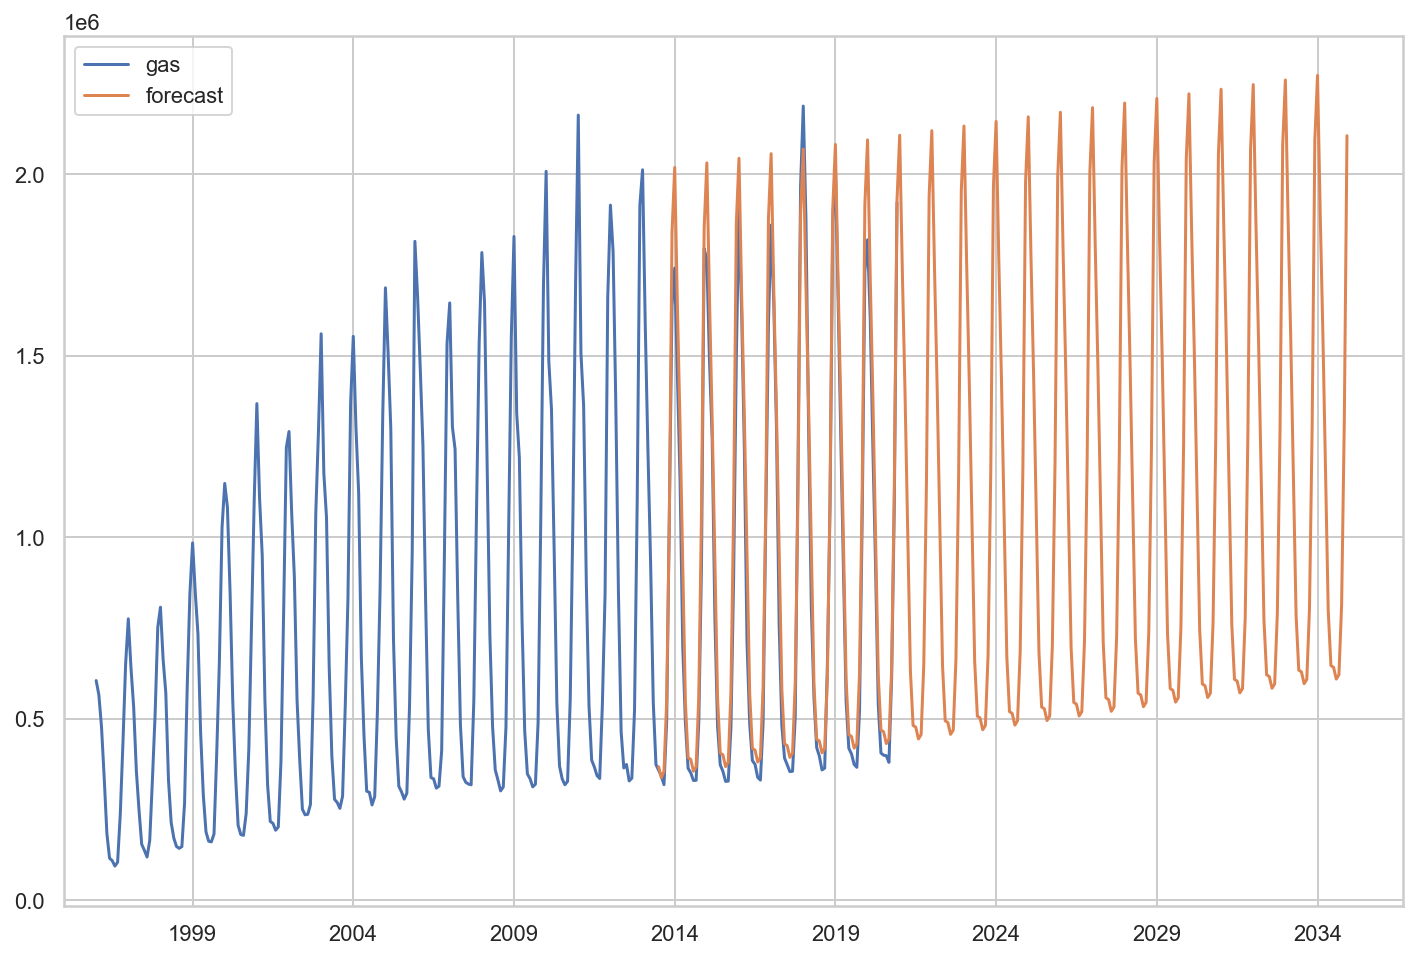

In [42]:
civil['forecast'] = results.predict(start=210, end=469, dynamic=True)
civil[['gas', 'forecast']].plot(figsize=(12,8), xlim=[300,800])

In [43]:
civil["2020-12-01":]

,gas,rolling_mean_diff,forecast
2020-12-01,1921404.0,NaN,1.928198e+06
2021-01-01,NaN,NaN,2.106997e+06
2021-02-01,NaN,NaN,1.729060e+06
2021-03-01,NaN,NaN,1.396169e+06
2021-04-01,NaN,NaN,1.012745e+06
...,...,...,...
2034-08-01,NaN,NaN,6.095419e+05
2034-09-01,NaN,NaN,6.215699e+05
2034-10-01,NaN,NaN,8.152824e+05
2034-11-01,NaN,NaN,1.319201e+06


In [44]:
civil['forecast'][300:].to_csv("sarima_civil.csv", mode='w')

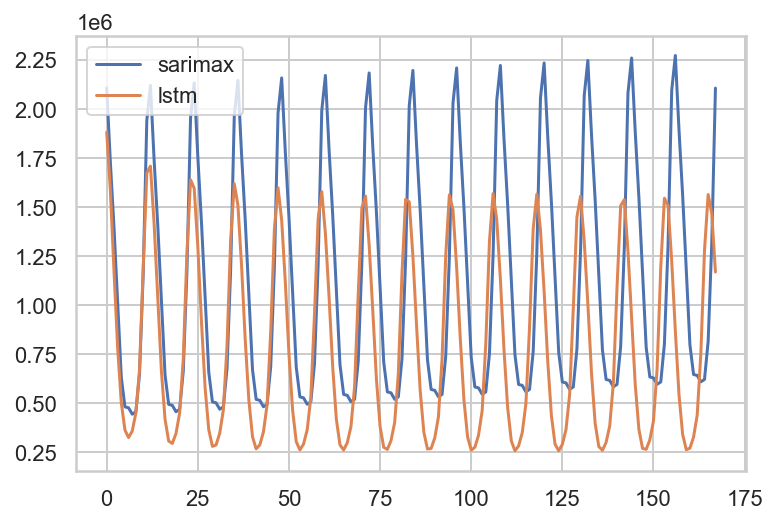

In [4]:
a = pd.read_csv('sarima_civil.csv')
b = pd.read_csv('lstm.csv')
ax=a.plot()
b['CIVIL'].plot(ax=ax)
plt.legend(['sarimax','lstm'])